In [19]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive,widgets

In [50]:
def fun_eval(xi):
    #from numpy import Matrix
    import math
    c=[0,1,1,5,1]
    yi=c[0]+c[1]*xi[0]**3+c[2]*math.exp(xi[1])-c[3]*xi[1]**2-c[4]*xi[0]*xi[1];
    return yi

In [51]:
def study_function(xdata):
    from numpy import append
    sn,nd= xdata.shape
    ydata=[]
    for i in range(0,sn):
        xi=xdata[i,:]
        yi=fun_eval(xi)
        ydata=append(ydata,yi)
    return ydata

In [74]:
def param_study2D(parameter1,parameter2,LB,UB,angle):
    from numpy import ones,arange,transpose,array,linspace,meshgrid,shape,reshape,zeros
    from matplotlib.pyplot import subplots,plot,show,xlabel,ylabel,legend,title,tick_params,grid,ylim,xlim,xticks,yticks
    from mpl_toolkits import mplot3d
    %matplotlib inline
    gridn=10
    xs=transpose([array(linspace(LB,UB,gridn))])
    [xs1,xs2]=meshgrid(xs,xs)
    shape=shape(xs1)
    xs1=xs1.flatten('F')
    xs2=xs2.flatten('F')
    sn=len(xs1)
    parameter1=parameter1-1
    parameter2=parameter2-1
   

    xdata=zeros([sn,3])
    xdata[:,parameter1]=xs1
    xdata[:,parameter2]=xs2
    ydata=study_function(xdata)
    ydata=ydata.flatten('F')
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(xs1,xs2,ydata,cmap='gist_heat')
    fig.set_size_inches(18.5,18.5)
    ax.view_init(30, angle)
    
    

interactive(children=(Dropdown(description='parameter1', options=(1, 2, 3), value=1), Dropdown(description='pa…

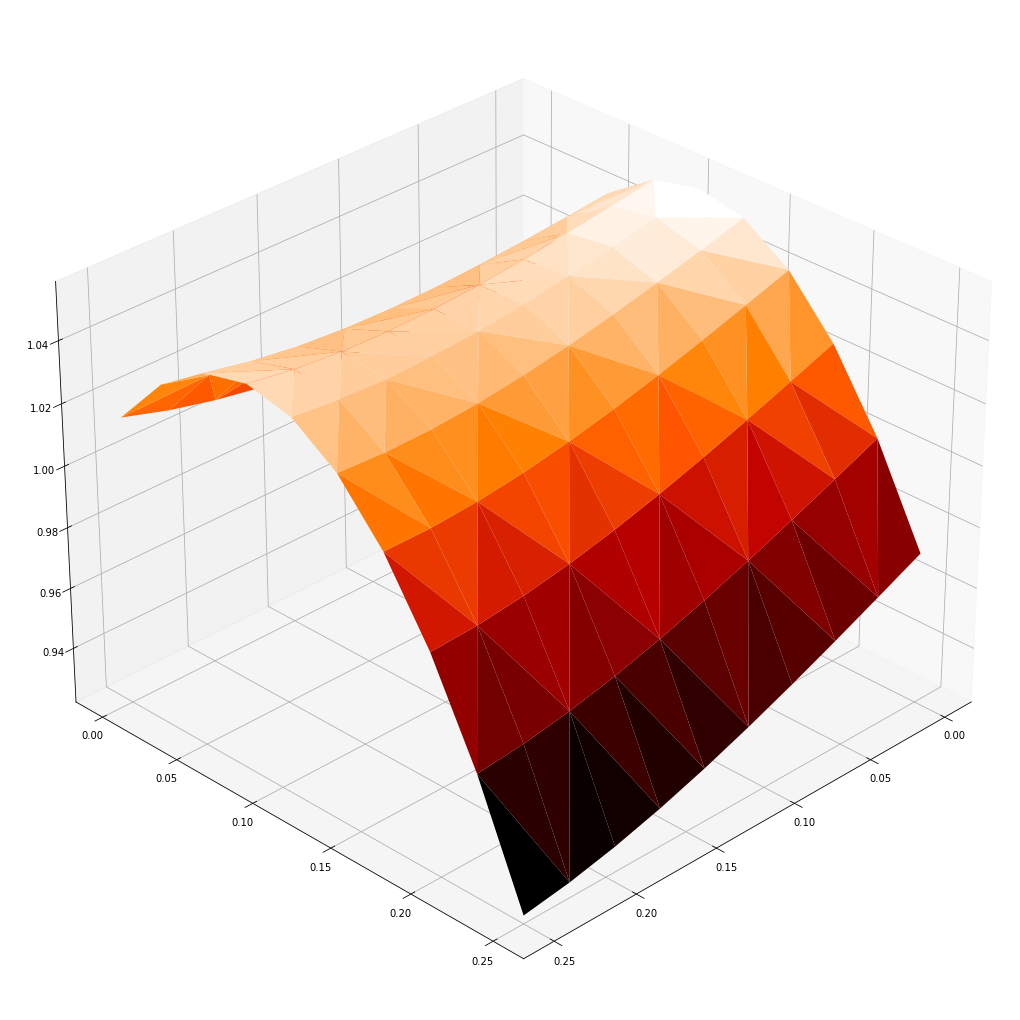

In [75]:
interactive(param_study2D,parameter1=[1,2,3],parameter2=[2,1,3],LB=[0,.25,.5,.75,1],UB=[.25,.5,.75,1],angle=widgets.IntSlider(min=0, max=360, step=15, value=45))